<a href="https://colab.research.google.com/github/maikol77/ftseAnalisysPandas/blob/main/FTSE_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import dei data del ftse alla world tramite yf, eliminazione delle colonne superflue e formattazione data**

Confronto tra investimento PIC e PAC di 9800 euro.
Il PAC composto da investimento mensile di 100 euro.
Partendo dall 1 gennaio 2017 fino ad adesso.

In [4]:
import yfinance as yf
import pandas as p
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

start = dt.datetime(2017, 1, 1)
end = dt.datetime.now()
data = yf.Ticker("VGWL.DE").history(start=start, end=end, interval="1mo")

data = data.drop(columns=["High", "Low", "Close", "Volume", "Dividends", "Stock Splits", "Capital Gains"])
data.index = data.index.strftime("%d/%m/%Y")

data.rename(columns={"Open": "Prezzo Apertura"}, inplace=True)

data


,Prezzo Apertura
Date,
01/10/2017,59.881422
01/11/2017,61.491415
01/12/2017,60.772967
01/01/2018,61.900418
01/02/2018,63.255707
...,...
01/07/2025,127.221293
01/08/2025,131.988606
01/09/2025,132.766534


In [1]:
investimento_mensile=100;

Investimento PIC

In [5]:
quote_tot=0
quota_acquistata=0
guadagno_composto=0

soldi_investiti=len(data)*investimento_mensile
quote_tot=soldi_investiti/data["Prezzo Apertura"].iloc[0]
soldi_alla_fine=quote_tot*data["Prezzo Apertura"].iloc[-1]


soldi_alla_fine = quote_tot * data["Prezzo Apertura"].iloc[-1]
guadagno = soldi_alla_fine/soldi_investiti*100
print("-----Investimento in un PIC di", investimento_mensile, "euro per", len(data)/12, "anni -------")
print("Soldi investiti ", soldi_investiti, "-----> Soldi alla fine: ", soldi_alla_fine)
print("quote che possiedi: ", quote_tot, " ad un prezzo ciascuna di: ", data["Prezzo Apertura"].iloc[-1])
print("Guadagno: ", int(guadagno), "%")


-----Investimento in un PIC di 100 euro per 8.166666666666666 anni -------
Soldi investiti  9800 -----> Soldi alla fine:  23170.52570562422
quote che possiedi:  163.65676935979462  ad un prezzo ciascuna di:  141.5800018310547
Guadagno:  236 %


<Axes: xlabel='Date'>

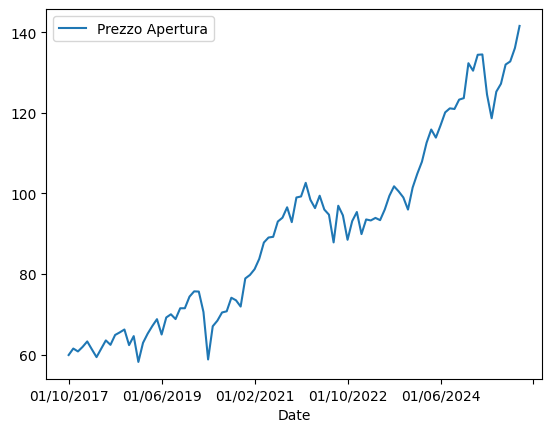

In [8]:
data.plot()

Investimento PAC

In [12]:
media_prezzo = np.average(data['Prezzo Apertura'].iloc[0:len(data)])
quota_acquistata=0
soldi_investiti = investimento_mensile*len(data)
soldi_attuali = [0] * len(data) # Initialize soldi_attuali as a list of zeros
quote_tot = 0 # Reset quote_tot for PAC calculation

for i in range(0, len(data)):
  quota_acquistata = investimento_mensile/data["Prezzo Apertura"].iloc[i]
  quote_tot += quota_acquistata
  soldi_attuali[i] = quote_tot*data["Prezzo Apertura"].iloc[i]


soldi_alla_fine = quote_tot * data["Prezzo Apertura"].iloc[-1]
guadagno = soldi_alla_fine/soldi_investiti*100
print("-----Investimento in un PAC di", investimento_mensile, "euro per", len(data)/12, "anni -------")
print("Soldi investiti ", soldi_investiti, "-----> Soldi alla fine: ", soldi_alla_fine)
print("quote che possiedi: ", quote_tot, " ad un prezzo ciascuna di: ", data["Prezzo Apertura"].iloc[-1])
print("Guadagno: ", int(guadagno), "%")

-----Investimento in un PAC di 100 euro per 8.166666666666666 anni -------
Soldi investiti  9800 -----> Soldi alla fine:  16389.16313183161
quote che possiedi:  115.75902613272004  ad un prezzo ciascuna di:  141.5800018310547
Guadagno:  167 %


Andamento PAC

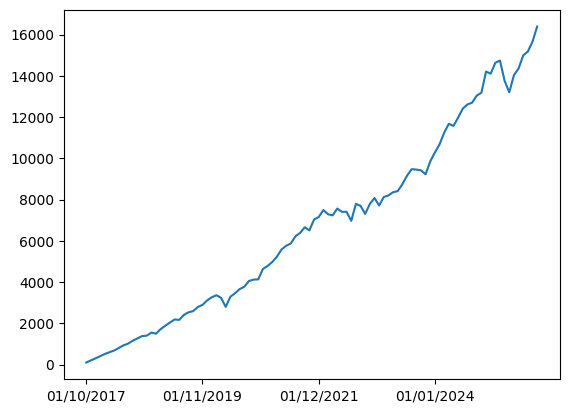

In [31]:
plt.plot(data.index, soldi_attuali)
plt.xticks(data.index[::25])

plt.show()
